# Basic optimization algorithms

The spirit of this simple tutorial consists in learning how to write simple solution algorithms. For each algorithm, test that it works, using simple test functions whose solution is known.

__Write a function `fixed_point(f::Function, x0::Float64)` which computes the fixed point of `f` starting from initial point `x0`.__

__Write a function `bisection(f::Function, a::Float64, b::Float64)` which computes a zero of function `f` within `(a,b)` using a bisection method.__

__Write a function `golden(f::Function, a::Float64, b::Float64)` which computes a zero of function `f` within `(a,b)` using a golden ratio method.__

__Write a function `zero_newton(f::Function, x0::Float64)` which computes the zero of function `f` starting from initial point `x0`.__

In [ ]:
f(x::Float64) = sinc(x) # sin(x)/x if x!= 0 otherwise 1 

In [6]:
df(x) = cos(x)/x - sin(x)/x^2

df (generic function with 1 method)

In [65]:
function zero_newton(f, x0::Float64; K=1000, η_tol=1e-8, trace=true, λ=1.0, ϵ_tol=1e-10)

    converged = false
    log = []
    
    for k =1:K
        
        f0  = f(x0)
        
        # if we have found a solution we stop
        ϵ = abs(f0)
        if ϵ<ϵ_tol
            converged = true
            break
        end
        
        df0 = df(x0)
        Δ = - f0/df0
        
        x1 = x0 + λ*Δ

        # backtracking
        # compute f(x1)
        # if |f(x1)|>|f(x0)|, backtrack
        
        ## successive approximation:
        η = abs(x1 - x0)
        
        if trace
            push!(log, (x1, η, ϵ))
        end
        
        if η<η_tol
            converged = true
            break
        end

        
        x0 = x1
        # when ready,:
#         return x1
        # or break
        
    end
    
    # note that x1 is not defined here (it is local to the loop
    
    if trace
        return x0, converged, log
    else
        return x0, converged
    end
end

zero_newton (generic function with 1 method)

In [63]:
x0 = 0.1
xstar, converged, log = zero_newton(f, x0; λ=0.1)

(3.000000100477996, true, Any[(3.0538477222224887, 2.9538477222224886), (3.048618534599732, 0.005229187622756815), (3.043898906961309, 0.004719627638422708), (3.039639107759519, 0.004259799201790315), (3.035794208333182, 0.003844899426336923), (3.032323645795437, 0.0034705625377449145), (3.029190815939786, 0.00313282985565122), (3.0263626974699536, 0.0028281184698322193), (3.0238095074359572, 0.0025531900339963443), (3.0215043868494593, 0.0023051205864978996)  …  (3.0000002261375496, 2.4133374409984754e-8), (3.0000002043313323, 2.180621727632115e-8), (3.0000001846278668, 1.970346552582214e-8), (3.0000001668243867, 1.780348002355936e-8), (3.0000001507376783, 1.608670840980153e-8), (3.0000001362021953, 1.453548303942398e-8), (3.000000123068354, 1.3133841125778645e-8), (3.0000001112009964, 1.1867357763151176e-8), (3.000000100477996, 1.0723000265500104e-8), (3.000000090789004, 9.688992275158625e-9)])

In [40]:
using Plots

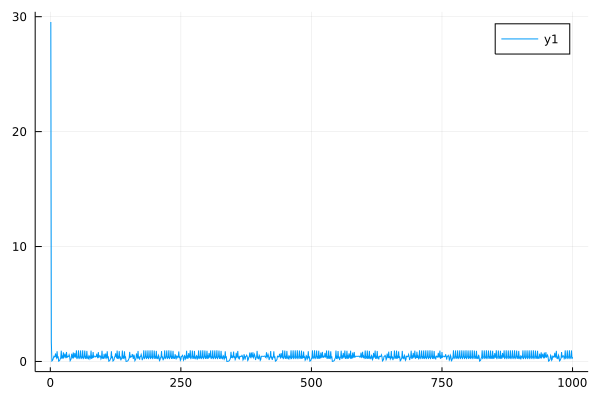

In [43]:
plot([e[2] for e in log]) # ot seems to oscillate forever

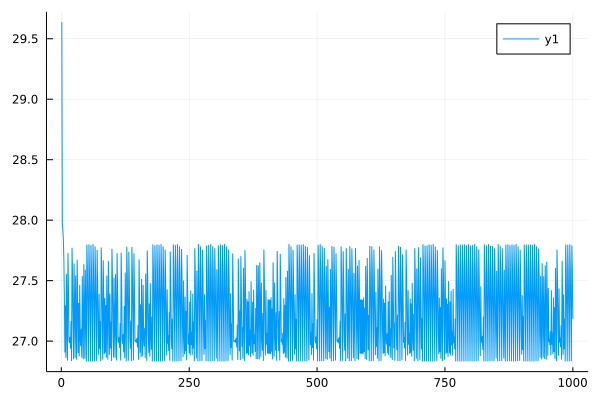

In [44]:
plot([e[1] for e in log]) # ot seems to oscillate forever

In [49]:
xvec = range(0, 50;length=1000);
yvec = sinc.(xvec);

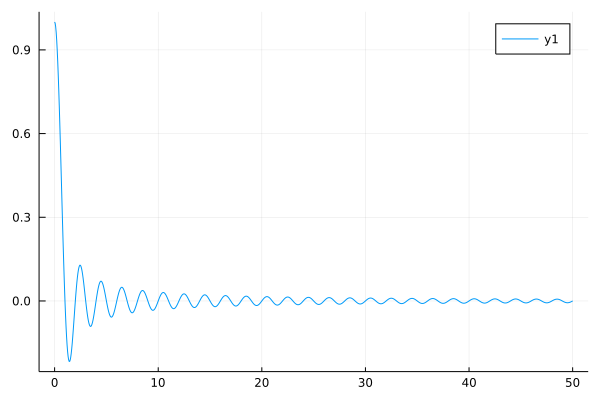

In [50]:
plot(xvec, yvec)

__Add an option `zero_newton(f::Function, x0::Float64, backtracking=true)` which computes the zero of function `f` starting from initial point `x0` using backtracking in each iteration.__

f (generic function with 2 methods)

In [ ]:
f

__Write a function `min_gd(f::Function, x0::Float64)` which computes the minimum of function `f` using gradient descent. Assume `f` returns a scalar and a gradient.__

__Write a function `min_nr(f::Function, x0::Float64)` which computes the minimum of function `f` using Newton-Raphson method. Assume `f` returns a scalar, a gradient, and a hessian.__

__Write a method `zero_newton(f::Function, x0::Vector{Float64})` which computes the zero of a vector valued function `f` starting from initial point `x0`.__

    

In [2]:
f(x) = [x[1] + x[2]^2, x[1] - x[2]]

f (generic function with 1 method)

In [4]:
f([0.4, 0.2])

2-element Array{Float64,1}:
 0.44000000000000006
 0.2

__Add an method `zero_newton(f::Function, x0::Vector{Float64}, backtracking=true)` which computes the zero of function `f` starting from initial point `x0` using backtracking in each iteration.__

__Add a method `zero_newton(f::Function, x0::Vector{Float64}, backtracking=true, lb=Vector{Float64})` which computes the zero of function `f` starting from initial point `x0` taking complementarity constraint into account `x>=lb` using the Fischer-Burmeister method.__